In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_dd4025c279df4f16b91f6cf10cf5b3ed = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7ITxTArvRSJA1HqOVXEDHT9R-zCP2kVgVYLKpJNViGUP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_dd4025c279df4f16b91f6cf10cf5b3ed.get_object(Bucket='datascience-donotdelete-pr-9i2b3zs0qw19l3',Key='RTC Location 2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head(3) 


,Date,Police_ref,Easting,Northing,Severity,Road_cond,Visibility,Casualties,Pedestrian,Cycles,...,Cross_ctrl,Cross_fac,Weather,SpCond,Carr_haz,Day,Location,Local_Auth,ReportedAt,Parish
0,20180101,18263388,519784,299454,2. Serious,2. Wet/Damp,4. Darkness: street lights present and lit,1,0,0,...,0. None,1. Zebra crossing,1. Fine without high winds,0,0. None,2. Monday,EASTFIELD ROAD AT JN WITH PADHOLME ROAD,E06000031,1. Yes,181
1,20180102,18257386,519682,270658,3. Slight,2. Wet/Damp,6. Darkness: no street lighting,2,0,0,...,0. None,0. None within 50m,1. Fine without high winds,0,0. None,3. Tuesday,NEAR BRAMPTON HUT SERVICES SOUTBOUND A1 NEAR J...,E07000011,1. Yes,26
2,20180103,18259484,540715,242553,3. Slight,1. Dry,6. Darkness: no street lighting,1,0,0,...,0. None,0. None within 50m,4. Fine with high winds,0,0. None,4. Wednesday,BARLEY ROAD B1368,E07000012,1. Yes,95


In [2]:
df_data_1.dtypes


Date           int64
Police_ref     int64
Easting        int64
Northing       int64
Severity      object
Road_cond     object
Visibility    object
Casualties     int64
Pedestrian     int64
Cycles         int64
P2W            int64
OAPs           int64
Children       int64
Manoeuvre     object
Time          object
Vehicles       int64
Roadclass1    object
Roadnum1       int64
Road_Type     object
Speed_Lim      int64
Junct_det     object
Junct_ctrl    object
Roadclass2    object
Roadnum2       int64
Cross_ctrl    object
Cross_fac     object
Weather       object
SpCond         int64
Carr_haz      object
Day           object
Location      object
Local_Auth    object
ReportedAt    object
Parish         int64
dtype: object

In [28]:
df = df_data_1[['Police_ref', 'Casualties', 'Vehicles', 'Roadnum1','Speed_Lim']] 

In [29]:
df.head() 

,Police_ref,Casualties,Vehicles,Roadnum1,Speed_Lim
0,18263388,1,2,0,30
1,18257386,2,2,1,40
2,18259484,1,1,1368,30
3,18257077,1,2,0,20
4,18255977,1,2,1096,50


In [30]:

import numpy as np
# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 

# Create the dictionary 
sev_dict ={'1. Fatal' : 1, '2. Serious' : 2, '3. Slight' : 3}  
  

In [31]:
# Add a new column named 'Sev'
df['Sev'] = df_data_1['Severity'].apply(set_value, args =(sev_dict, ))   

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
df.head() 

,Police_ref,Casualties,Vehicles,Roadnum1,Speed_Lim,Sev
0,18263388,1,2,0,30,2
1,18257386,2,2,1,40,3
2,18259484,1,1,1368,30,3
3,18257077,1,2,0,20,3
4,18255977,1,2,1096,50,3


In [33]:
road_dict ={'1. Dry' : 1, '2. Wet/Damp' : 2, '3. Snow' : 3, '4. Frost/Ice' : 4}   
  

In [34]:
df['Road'] = df_data_1['Road_cond'].apply(set_value, args =(road_dict, ))  

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
df.head()


,Police_ref,Casualties,Vehicles,Roadnum1,Speed_Lim,Sev,Road
0,18263388,1,2,0,30,2,2
1,18257386,2,2,1,40,3,2
2,18259484,1,1,1368,30,3,1
3,18257077,1,2,0,20,3,1
4,18255977,1,2,1096,50,3,2


In [36]:
vis_dict ={'1. Daylight' : 1, '4. Darkness: street lights present and lit' : 4, '5. Darkness: street lights present but unlit' : 5,
           '6. Darkness: no street lighting' : 6, '7. Darkness: street lighting unknown' : 7}
            

In [37]:
df['Vis'] = df_data_1['Visibility'].apply(set_value, args =(vis_dict, ))  

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
df.head()


,Police_ref,Casualties,Vehicles,Roadnum1,Speed_Lim,Sev,Road,Vis
0,18263388,1,2,0,30,2,2,4
1,18257386,2,2,1,40,3,2,6
2,18259484,1,1,1368,30,3,1,6
3,18257077,1,2,0,20,3,1,4
4,18255977,1,2,1096,50,3,2,6


In [39]:
df.isnull().sum() 

Police_ref    0
Casualties    0
Vehicles      0
Roadnum1      0
Speed_Lim     0
Sev           0
Road          0
Vis           0
dtype: int64

In [45]:
weat_dict ={'1. Fine without high winds' : 1, '2. Raining without high winds' : 2, '3. Snowing without high winds' : 3,
           '4. Fine with high winds' : 4, '5. Raining with high winds' : 5, '6. Snowing with high winds' : 6, 
          '7. Fog or mist' : 7, '8. Other' : 8, '9. Unknown' : 9
           } 
            

In [46]:
df['Weat'] = df_data_1['Weather'].apply(set_value, args =(weat_dict, ))  

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
df.head() 


,Police_ref,Casualties,Vehicles,Roadnum1,Speed_Lim,Sev,Road,Vis,Weat
0,18263388,1,2,0,30,2,2,4,1
1,18257386,2,2,1,40,3,2,6,1
2,18259484,1,1,1368,30,3,1,6,4
3,18257077,1,2,0,20,3,1,4,1
4,18255977,1,2,1096,50,3,2,6,4


In [49]:
df.isnull().sum() 

Police_ref    0
Casualties    0
Vehicles      0
Roadnum1      0
Speed_Lim     0
Sev           0
Road          0
Vis           0
Weat          0
dtype: int64

In [51]:
sum_col = df_data_1['Pedestrian'] + df_data_1['Cycles'] + df_data_1['P2W'] + df_data_1['OAPs'] + df_data_1['Children'] 

In [52]:
df['Incidental'] = sum_col 

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [53]:
df.head()  

,Police_ref,Casualties,Vehicles,Roadnum1,Speed_Lim,Sev,Road,Vis,Weat,Incidental
0,18263388,1,2,0,30,2,2,4,1,0
1,18257386,2,2,1,40,3,2,6,1,0
2,18259484,1,1,1368,30,3,1,6,4,0
3,18257077,1,2,0,20,3,1,4,1,0
4,18255977,1,2,1096,50,3,2,6,4,0


In [54]:
df.isnull().sum() 

Police_ref    0
Casualties    0
Vehicles      0
Roadnum1      0
Speed_Lim     0
Sev           0
Road          0
Vis           0
Weat          0
Incidental    0
dtype: int64

In [62]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 

In [68]:
from sklearn.linear_model import LogisticRegression 

In [78]:
X = np.asarray(df[['Road', 'Vis', 'Weat', 'Speed_Lim']]) 
X[0:5] 

array([[ 2,  4,  1, 30],
       [ 2,  6,  1, 40],
       [ 1,  6,  4, 30],
       [ 1,  4,  1, 20],
       [ 2,  6,  4, 50]])

In [80]:
y = df[['Casualties']] 
y[0:5] 

,Casualties
0,1
1,2
2,1
3,1
4,1


In [82]:
from sklearn import preprocessing 

In [83]:
X = preprocessing.StandardScaler().fit(X).transform(X) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [84]:
X[0:5] 

array([[ 1.27756184,  1.0778083 , -0.33360393, -0.81710103],
       [ 1.27756184,  2.18008443, -0.33360393, -0.20512428],
       [-0.53231743,  2.18008443,  1.50854403, -0.81710103],
       [-0.53231743,  1.0778083 , -0.33360393, -1.42907777],
       [ 1.27756184,  2.18008443,  1.50854403,  0.40685246]])

In [85]:
from sklearn.model_selection import train_test_split 

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

In [87]:
print('Train set:', X_train.shape, y_train.shape) 

Train set: (901, 4) (901, 1)


In [88]:
print('Test set:', X_test.shape, y_test.shape) 

Test set: (901, 4) (901, 1)


In [89]:
from sklearn.metrics import confusion_matrix 

In [91]:
LR = LogisticRegression(solver='liblinear').fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [92]:
yhat = LR.predict(X_test) 

In [93]:
yhat 

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [96]:
yhat_prob = LR.predict_proba(X_test) 

In [97]:
yhat_prob 

array([[0.60083333, 0.24668919, 0.0804246 , ..., 0.01543285, 0.00826406,
        0.00763526],
       [0.80651844, 0.1152144 , 0.03767528, ..., 0.00496825, 0.00441969,
        0.00561676],
       [0.39237384, 0.45425546, 0.09352499, ..., 0.01391918, 0.01676548,
        0.0064098 ],
       ...,
       [0.81664294, 0.10455399, 0.03947264, ..., 0.00545041, 0.00367513,
        0.00411181],
       [0.76850789, 0.14164905, 0.04424076, ..., 0.00634133, 0.00534799,
        0.00614904],
       [0.54651987, 0.29584604, 0.08223638, ..., 0.01660058, 0.01133867,
        0.00875147]])

In [105]:
from sklearn.metrics import f1_score 
from sklearn.metrics import jaccard_similarity_score 

In [106]:
f1_score(y_test, yhat, average='weighted') 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6353476131233422

In [107]:
jaccard_similarity_score(y_test, yhat) 

0.7413984461709212

In [108]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=4)
print ('Train set:', X_train,  y_train)
print ('Test set:', X_test,  y_test) 

Train set: [[ 1.27756184  1.0778083  -0.33360393 -0.81710103]
 [ 1.27756184  2.18008443 -0.33360393  1.01882921]
 [ 1.27756184 -0.57560591 -0.33360393  1.01882921]
 ...
 [-0.53231743  2.18008443 -0.33360393  1.63080595]
 [-0.53231743 -0.57560591 -0.33360393 -0.20512428]
 [-0.53231743  2.7312225  -0.33360393  1.63080595]]       Casualties
1628           1
17             3
25             1
873            1
370            1
722            1
1222           1
1060           1
379            1
1784           2
642            3
1357           1
1491           1
1532           4
347            1
1792           1
1739           1
1189           1
1509           2
1383           1
465            1
1449           1
459            2
1467           2
736            1
601            1
1730           1
131            2
1221           1
1100           1
...          ...
1533           1
422            1
1737           2
149            1
533            2
183            1
1024           2
1411          

In [109]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)  

yhat = clf.predict(X_test)
yhat [0:5] 


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 1, 1])

In [110]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')  

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6284215778710558

In [111]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat) 

0.7358490566037735

In [112]:
# Import seaborn
import seaborn as sns 

In [118]:
X = np.asarray(df[['Road']]) 

In [119]:
y = df[['Casualties']]  

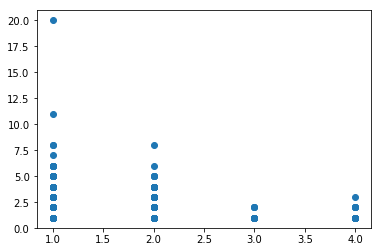

In [120]:
plt.scatter(X, y) 